# Salary Prediction
This project predicts salary based on job descriptions.

### Features:
1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

## Import libraries
This project uses machine learning approach, so lots of sklearn classes are used.

In [5]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# set display to 3 decimal max
pd.set_option('precision', 3)

## Load data
First thing first, unzip it and see what's inside!

In [8]:
zipfile_path = os.path.join("SalaryPredictions.zip")
zipfile_ref = zipfile.ZipFile(zipfile_path, 'r')
zipfile_ref.extractall()
zipfile_ref.close()

print(os.listdir("data"))

['test_features.csv', 'train_features.csv', 'train_salaries.csv']


In [35]:
test_df = pd.read_csv(os.path.join("data", "test_features.csv"), header=0, index_col=0)
train_df = pd.read_csv(os.path.join("data", "train_features.csv"), header=0, index_col=0)
train_df['salary'] = pd.read_csv(os.path.join("data", "train_salaries.csv"), header=0, index_col=0)

In [36]:
print(train_df.info())
display(train_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   companyId            1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               1000000 non-null  object
 3   major                1000000 non-null  object
 4   industry             1000000 non-null  object
 5   yearsExperience      1000000 non-null  int64 
 6   milesFromMetropolis  1000000 non-null  int64 
 7   salary               1000000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 68.7+ MB
None


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31


In [34]:
print(test_df.info())
display(train_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   companyId            1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               1000000 non-null  object
 3   major                1000000 non-null  object
 4   industry             1000000 non-null  object
 5   yearsExperience      1000000 non-null  int64 
 6   milesFromMetropolis  1000000 non-null  int64 
 7   salary               1000000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 68.7+ MB
None


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31


In [37]:
print(test_df.info())
display(test_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362685407687 to JOB1362686407686
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   companyId            1000000 non-null  object
 1   jobType              1000000 non-null  object
 2   degree               1000000 non-null  object
 3   major                1000000 non-null  object
 4   industry             1000000 non-null  object
 5   yearsExperience      1000000 non-null  int64 
 6   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 61.0+ MB
None


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78


## Clean data
Before we dive in to data analysis, we should perform basic cleaning. Look for:
1. Any missing values (np.None or np.NaN) in entire training and testing set
    * from train_df.info() and test_df.info(), there's no null cell
2. Any duplicated samples in training set
3. Any invalid yearsExperience (yearsExperience <= 0) in training set
4. Any invalid milesFromMetropolis (milesFromMetropolis < 0) in training set
5. Any invalid salary (salary < 0) in training set

In [4]:
print("Drop duplicated rows.")
train_df.drop_duplicates(inplace=True)

print("Any invalid yearsExperience in training set?", train_df['yearsExperience'].lt(0).values.any())
print("Any invalid milesFromMetropolis in training set?", train_df['milesFromMetropolis'].lt(0).values.any())
print("Any invalid salary in training set?", train_df['salary'].le(0).values.any())

Any null value in training set? False
Any null value in testing set? False
Drop duplicated rows.
Any invalid yearsExperience in training set? False
Any invalid milesFromMetropolis in training set? False
Any invalid salary in training set? True


No missing value, duplicated rows are dropped, and no invalid value in yearsExperience and milesFromMetropolis! Great!

But there are jobs with salary <= 0. Since we have 1,000,000 samples, we have enough data to handle removing those jobs instead of assigning them new valid salary:

In [5]:
invalid_salary_jobs = train_df.index[train_df['salary'].le(0)].tolist()
print("Remove following jobs with invalid salary:", invalid_salary_jobs)
train_df = train_df.drop(invalid_salary_jobs)

data = train_df.copy()
print("Training set now has shape:", train_df.shape)

Remove following jobs with invalid salary: ['JOB1362684438246', 'JOB1362684903671', 'JOB1362685059763', 'JOB1362685223816', 'JOB1362685235843']


## Explore data
Now that we've done the basic cleaning, let's look at each feature one by one and generate some statistics reports to further analyze our data.
### Company ID
In real-life, if a company is well-known or an international organization, the salary is likely to be higher than local startups. We can generate a statistics report to find out which company pays more in general.

In [17]:
train_df.groupby(['companyId']).describe()['salary'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
companyId,,,,,,,,
COMP40,16006.0,116.792,38.649,21.0,89.0,114.0,142.0,272.0
COMP2,15636.0,116.769,38.601,20.0,90.0,114.0,142.0,268.0
COMP44,15997.0,116.698,38.801,20.0,89.0,115.0,142.0,294.0
COMP13,15951.0,116.568,38.880,21.0,89.0,114.0,142.0,273.0
COMP21,15944.0,116.551,38.772,20.0,89.0,114.0,142.0,287.0
...,...,...,...,...,...,...,...,...
COMP54,15975.0,115.596,38.369,22.0,88.0,113.0,140.0,274.0
COMP42,15939.0,115.491,38.806,19.0,88.0,113.0,141.0,281.0
COMP57,15633.0,115.400,38.515,19.0,88.0,113.0,140.0,263.0


Since there are 63 companies, let's randomly select some companies and see their statistics:

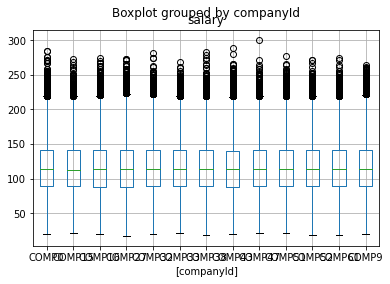

In [18]:
companies = train_df['companyId'].unique()
pick_n_companies = 15
rand_companies = companies[np.random.randint(1, len(companies), pick_n_companies)]

for i in range(pick_n_companies):
    if i==0:
        groups = train_df[['companyId', 'salary']].loc[train_df['companyId']==rand_companies[i], :]
    else:
        group = train_df[['companyId', 'salary']].loc[train_df['companyId']==rand_companies[i], :]
        groups = pd.concat([groups, group], axis=0)

groups.boxplot(by='companyId')
plt.show()

Observations on both statistics reports:
1. Similar distribution
2. Average salary varies only a little
3. Similar deviation
4. The min, 25%, 50%, and 75% are almost the same between companies

The salary distributions are very similar that no company particularly stands out and gives higher or lower wage, and of course no trend or pattern in this feature that relates to salary. Unless there are other features depending on companyId, so far it's not giving me useful info and it's likely to be dropped.

### Job Types
There are 8 types of job: CEO, CFO, CTO, JANITOR, JUNIOR, MANAGER, SENIOR and VICE_PRESIDENT.

It's reasonable to assume the chief positions offers much higher than JANITOR and JUNIOR.

In [19]:
train_df.groupby(['jobType']).size()

jobType
CEO               124767
CFO               124359
CTO               125038
JANITOR           124869
JUNIOR            124573
MANAGER           125110
SENIOR            125870
VICE_PRESIDENT    125223
dtype: int64

Each job type has 124,000~126,000 sample. That's good, so I don't have to make adjustment for imbalanced samples for each job type.

Let's look at salary distribution.

                   count     mean     std   min    25%    50%    75%    max
jobType                                                                    
CEO             124767.0  145.313  34.424  55.0  120.0  142.0  167.0  298.0
CTO             125038.0  135.481  33.092  51.0  111.0  132.0  156.0  301.0
CFO             124359.0  135.459  33.070  51.0  111.0  132.0  156.0  301.0
VICE_PRESIDENT  125223.0  125.371  31.956  44.0  102.0  122.0  146.0  272.0
MANAGER         125110.0  115.370  30.835  37.0   93.0  112.0  135.0  270.0
SENIOR          125870.0  105.489  30.070  31.0   83.0  102.0  124.0  258.0
JUNIOR          124573.0   95.336  29.246  23.0   74.0   92.0  114.0  248.0
JANITOR         124869.0   70.822  24.643  17.0   52.0   68.0   86.0  189.0


<AxesSubplot:title={'center':'salary'}, xlabel='[jobType]'>

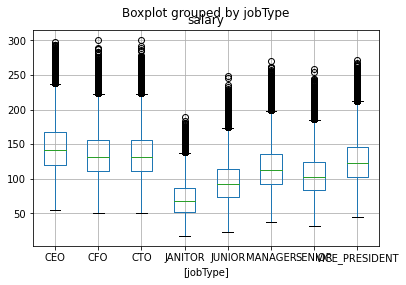

In [20]:
print(train_df.groupby(['jobType']).describe()['salary'].sort_values(by='mean', ascending=False))
train_df[['jobType', 'salary']].boxplot(by='jobType')

Looks like there's a rule to follow:
1. The differences in average salary between each job type is the largest among all featuers
    * Average salary ranges from 145 to 70
2. Both CFO and CTO offer same salary and distribution
3. The ranking of average salary is: CEO > CFO = CTO > VP > MANAGER > SENIOR > JUNIOR >> JANITOR
4. The deviation also decreases with average salary
5. Most positions are slightly positive skewed Gaussian distribution

Some data transformation is needed to emphasize the rules in jobType vs. salary. 

To visualize more on the skewness, use histograms and calculation of skewness:

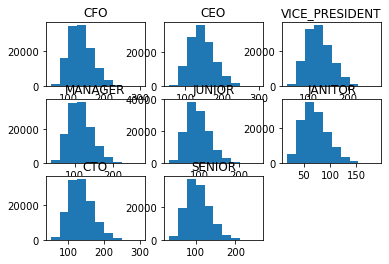

jobType
CEO               0.491
CFO               0.515
CTO               0.512
JANITOR           0.634
JUNIOR            0.594
MANAGER           0.552
SENIOR            0.556
VICE_PRESIDENT    0.527
Name: salary, dtype: float64

In [21]:
jobTypes = train_df['jobType'].unique()

for i in range(len(jobTypes)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df.loc[train_df['jobType']==jobTypes[i], 'salary'])
    plt.title(jobTypes[i])
plt.show()

train_df.groupby(['jobType'])['salary'].skew()

The histogram and skew table back up our previous assumption of positive skewness. As shown in table, the skewness are all positive and very small, and the histogram for each position only slightly lean toward left. 

The skewness level is: CEO < CFO = CTO < VICE_PRESIDENT < MANAGER = SENIOR < JUNIOR < JANITOR, which is opposite of average salary ranking! My guessing would be that lower positions usually have more room to negotiate for more salary due to other factors, such as world class company might offer more for the same position than local startups, or people with prior experience in the industry tends to be offered more than university graduates, and so on. And people interviewing for higher position might not be for the money, so the positions tends to offer standard salary.

### Degree
There are 5 types of degree: BACHLORS, DOCTORAL, HIGH_SCHOOL, MASTERS, and NONE

I expect that more professional position asks for higher educatation, so jobs requiring DOCTORAL degree might offer much higher than HIGH SCHOOL graduated. But will it be the same for DOCTORAL vs. MASTER degree? How much of a gap in salary will it be?

In [22]:
train_df.groupby(['degree']).size()

degree
BACHELORS      175492
DOCTORAL       175359
HIGH_SCHOOL    236879
MASTERS        175307
NONE           236772
dtype: int64

From number of jobs, we see that:
1. Number of jobs asking for NONE degree is almost the same as asking for HIGH_SCHOOL degree.
2. Number of jobs asking for BACHELORS, MASTERS, and DOCTORAL are almost the same.

                count     mean     std   min    25%    50%    75%    max
degree                                                                  
DOCTORAL     175359.0  135.492  35.790  45.0  109.0  132.0  158.0  301.0
MASTERS      175307.0  130.506  35.400  38.0  105.0  127.0  153.0  301.0
BACHELORS    175492.0  125.455  35.043  35.0  100.0  122.0  148.0  294.0
HIGH_SCHOOL  236879.0  101.930  36.111  18.0   75.0   99.0  125.0  260.0
NONE         236772.0   98.185  34.913  17.0   72.0   95.0  121.0  254.0


<AxesSubplot:title={'center':'salary'}, xlabel='[degree]'>

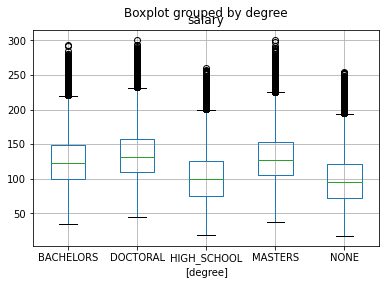

In [23]:
print(train_df.groupby(['degree']).describe()['salary'].sort_values(by='mean', ascending=False))
train_df[['degree', 'salary']].boxplot(by='degree')

From statistics reports, it can be observed that:
1. Jobs asking for HIGH_SCHOOL degree offer almost the same salary as not asking any degree (NONE). 
2. Jobs asking for HIGH_SCHOOL degree or NONE offer much less than BACHELORS and above. 
3. Distribution for BACHELORS, MASTERS, and DOCTORAL shifts and narrows in same rate.
4. The ranking of average salary is: DOCTORAL > MASTERS > BACHELORS >> HIGH_SCHOOL > NONE.
5. Except HIGH_SCHOOL, the ranking of deviation is the same as average salary
    * HIGH_SCHOOL has highest deviation
    * Maybe some jobs are intern positions that allow students to continue higher education while working, thus the salary is negotiable judging from their potential
    * Maybe other jobs are general labor jobs that don't require any professional knowledge, thus paid less
6. All degree are Gaussian distributed. And maybe positively skewed.

Combine with finding from number of jobs, seems like data can be seperated to two groups:
1. NONE and HIGH_SCHOOL: more job opening but lower offer
2. BACHELORS, MASTERS, DOCTORAL: less job openings and higher offer

Will it simplify the degree feature too much? Need to experiments them to find out!

Again, let's verify the Gaussian distribution and skewness with histograms.

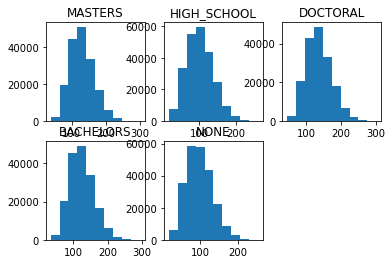

degree
BACHELORS      0.462
DOCTORAL       0.457
HIGH_SCHOOL    0.413
MASTERS        0.468
NONE           0.465
Name: salary, dtype: float64

In [24]:
jobTypes = train_df['degree'].unique()

for i in range(len(jobTypes)):
    plt.subplot(2, 3, i+1)
    plt.hist(train_df.loc[train_df['degree']==jobTypes[i], 'salary'])
    plt.title(jobTypes[i])
plt.show()

train_df.groupby(['degree'])['salary'].skew()

As expected, it's Gaussian and positive skewed. 

The level of skewness is: MASTERS = NONE = BACHELORS > DOCTORAL >> HIGH_SCHOOL, all with very little difference. It's interesting that HIGH_SCHOOL degree is skewed the least and also offered second to least, suggesting that jobs requiring HIGH_SCHOOL are more fixed compare to other degrees.

### Major
There are 9 majors: BIOLOGY, BUSINESS, CHEMISTRY, COMPSCI (computer science), ENGINEERING, LITERATURE, MATH, NONE, and PHYSICS

I expect the technical (ENGINEERING and COMPSCI) and BUSINESS major might be offered more than pure science (BIOLOGY, CHEMISTRY, MATH, PHYSICS) and LITERATURE major since they're more practical (eg. designing product, analyzing market trend, etc.) and less theoratical or economic (eg. research papers, studying Shakespeare, etc.).

In [25]:
train_df.groupby(['major']).size()

major
BIOLOGY         58374
BUSINESS        58518
CHEMISTRY       58874
COMPSCI         58381
ENGINEERING     58594
LITERATURE      58684
MATH            57800
NONE           532176
PHYSICS         58408
dtype: int64

Number of jobs asking for no major is more than other jobs combined and also more than half of the data. The imbalance data says that more than half of the offerings don't look at applicant's major, everyone can apply. But this raises some questions:
* Does it reflect on salary? 
* If the major is irrelevent, do those jobs have lower wage because it's not professional? 
     * For example, workers at warehouse or clark at supermarket might not need be any major to work.
* Does it suggest us that the major doesn't provide valueable information since so many jobs don't require any and we should focus on other features such as yearsExperience? 
* Is it related to other features?
    * For example, OLD and SERVICE industry are willing to hire more NONE major employees than WEB or FINANCE?
    * For example, is employee likely to be paid more with higher education diploma in any major?

Let's confirm it from statistics report.

                count     mean     std   min    25%    50%    75%    max
major                                                                   
ENGINEERING   58594.0  138.441  38.179  41.0  111.0  135.0  163.0  301.0
BUSINESS      58518.0  135.649  37.007  40.0  109.0  132.0  159.0  294.0
MATH          57800.0  133.322  35.539  39.0  107.0  130.0  156.0  280.0
COMPSCI       58381.0  132.076  34.777  41.0  107.0  129.0  154.0  286.0
PHYSICS       58408.0  130.373  34.957  38.0  105.0  127.0  153.0  293.0
CHEMISTRY     58874.0  129.072  34.833  40.0  104.0  126.0  151.0  282.0
BIOLOGY       58374.0  127.934  34.820  35.0  103.0  125.0  150.0  285.0
LITERATURE    58684.0  124.423  33.576  37.0  100.0  122.0  146.0  271.0
NONE         532176.0  102.592  36.134  17.0   76.0  100.0  126.0  270.0


<AxesSubplot:title={'center':'salary'}, xlabel='[major]'>

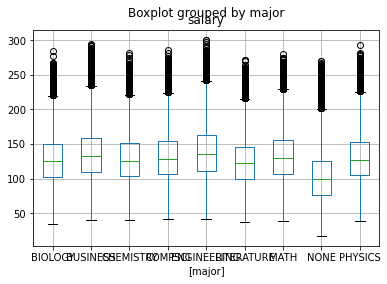

In [26]:
print(train_df.groupby(['major']).describe()['salary'].sort_values(by='mean', ascending=False))
train_df[['major', 'salary']].boxplot(by='major')

1. NONE obviously has lower distribution than others by great amount.
2. The ranking of average salary is: ENGINEERING > BUSINESS > MATH > COMPSCI > PHYSICS > CHEMISTRY > BIOLOGY > LITERATURE >> NONE
3. BUSINESS and ENGINEERING have larger deviation
4. LITERATURE has smallest deviation
5. Ranking of deviation is similar to mean, except NONE has higher deviation
    * Lower paid jobs usually offers the standard salary
    * Higher paid jobs depends more on other factors, thus have wider range of salary
    * There can be various jobs that don't require any major, thus it also heavily depends on other features
6. Gaussian distributed and skew to positive

This verifies our initial guessing that jobs with no major requirement might be less professional and thus paid less. But consider the imbalanced data, it's too early to assume all jobs not requiring major pay less since we're not sure if there are other factors influencing the salary. Need more digging!

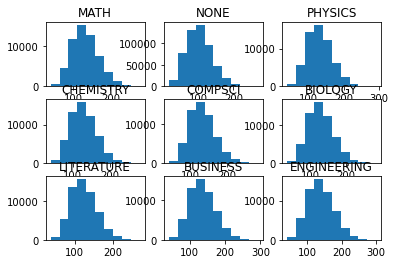

major
BIOLOGY        0.422
BUSINESS       0.458
CHEMISTRY      0.430
COMPSCI        0.453
ENGINEERING    0.430
LITERATURE     0.447
MATH           0.437
NONE           0.422
PHYSICS        0.444
Name: salary, dtype: float64

In [27]:
jobTypes = train_df['major'].unique()

for i in range(len(jobTypes)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df.loc[train_df['major']==jobTypes[i], 'salary'])
    plt.title(jobTypes[i])
plt.show()

train_df.groupby(['major'])['salary'].skew()

BUSINESS is the most skewed and BIOLOGY and NONE are least skewed. But compare to other features like jobType, all majors are skewed at similar rate.

### Industry
There are 7 types of industry: AUTO (automobile), EDUCATION, FINANCE, HEALTH, OIL, SERVICE, and WEB

I expect FINANCE and WEB pays relatively higher and SERVICE pays lower.

In [28]:
train_df.groupby(['industry']).size()

industry
AUTO         142907
EDUCATION    142781
FINANCE      142848
HEALTH       142728
OIL          142756
SERVICE      142610
WEB          143179
dtype: int64

Each industry has around 142,800 openings.

              count     mean     std   min    25%    50%    75%    max
industry                                                              
OIL        142756.0  130.957  38.527  37.0  103.0  128.0  156.0  301.0
FINANCE    142848.0  130.752  38.319  36.0  103.0  128.0  156.0  294.0
WEB        143179.0  121.652  38.164  31.0   94.0  119.0  146.0  290.0
HEALTH     142728.0  115.743  36.863  28.0   89.0  114.0  140.0  275.0
AUTO       142907.0  109.443  36.089  25.0   84.0  108.0  133.0  264.0
SERVICE    142610.0  104.452  35.575  22.0   79.0  103.0  128.0  256.0
EDUCATION  142781.0   99.457  35.107  17.0   75.0   98.0  122.0  253.0


<AxesSubplot:title={'center':'salary'}, xlabel='[industry]'>

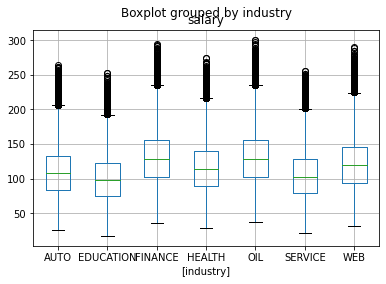

In [29]:
print(train_df.groupby(['industry']).describe()['salary'].sort_values(by='mean', ascending=False))
train_df[['industry', 'salary']].boxplot(by='industry')

Findings:
1. FINANCE and OIL(!) have highest wage and most stretched deviation
2. FINANCE and OIL have the same distribution
3. The ranking of average salary is: FINANCE = OIL > WEB > HEALTH > AUTO > SERVICE > EDUCATION
4. The ranking of deviation is the same as average salary
    * There's a significant drop between WEB and HEALTH
    * Is there any relationship between group:(OIL, FINANCE, WEB) and group:(HEALTH, AUTO, SERVICE, EDUCATION)?
5. The differences between each industry's average salary are the smallest among all features
    * The average salary ranges from 130 to 99
5. Gaussian distribution and positive skew

Let's look at the salary histograms and skewness

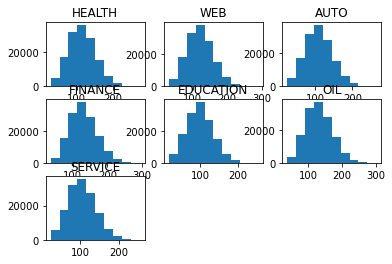

industry
AUTO         0.323
EDUCATION    0.304
FINANCE      0.345
HEALTH       0.321
OIL          0.359
SERVICE      0.315
WEB          0.348
Name: salary, dtype: float64

In [30]:
jobTypes = train_df['industry'].unique()

for i in range(len(jobTypes)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df.loc[train_df['industry']==jobTypes[i], 'salary'])
    plt.title(jobTypes[i])
plt.show()

train_df.groupby(['industry'])['salary'].skew()

The skewness is the relatively small among all features and skews at similar rate. Similar to the deviations, there's a gap in skewness between group:(OIL, WEB, FINANCE) and group:(AUTO, HEALTH, SERVICE, EDUCATION).

### Years of Experience
Span from 0 to 24 years. Let's select a few and see their distributions.

I expect the more years of experience a job asks, the more it pays. But is there a plateau? Is the relationship linear?

In [31]:
np.unique(train_df['yearsExperience'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

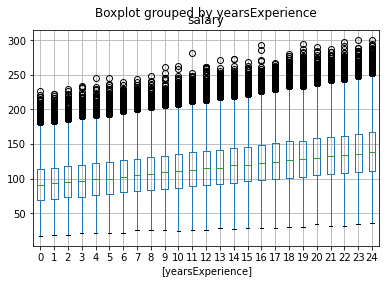

In [32]:
years= np.arange(24+1)
for i in range(len(years)):
    if i==0:
        groups = train_df[['yearsExperience', 'salary']].loc[train_df['yearsExperience']==years[i], :]
    else:
        group = train_df[['yearsExperience', 'salary']].loc[train_df['yearsExperience']==years[i], :]
        groups = pd.concat([groups, group], axis=0)

groups.boxplot(by='yearsExperience')
plt.show()

As expected:
1. The yearsExperience and average salary have linear relationship
2. The deviation increases with average salary
3. Gaussian distribution and positive skew

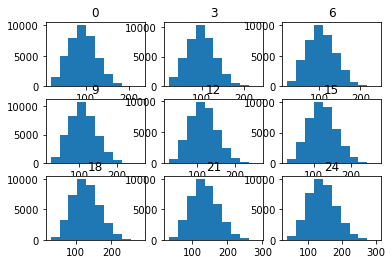

yearsExperience
0     0.232
1     0.238
2     0.227
3     0.258
4     0.249
5     0.270
6     0.240
7     0.255
8     0.250
9     0.247
10    0.265
11    0.279
12    0.288
13    0.289
14    0.268
15    0.268
16    0.271
17    0.278
18    0.276
19    0.266
20    0.285
21    0.283
22    0.296
23    0.292
24    0.298
Name: salary, dtype: float64

In [33]:
years= np.arange(0, 24+1, 3)
for i in range(len(years)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df.loc[train_df['yearsExperience']==years[i], 'salary'])
    plt.title(years[i])
plt.show()

train_df.groupby(['yearsExperience'])['salary'].skew()

The skewness is the smallest of all features and skews at similar rate. Overall, the skewness increases with yearsExperience.

And to show the linear relationship, here's the plot of yearsExperience vs. average salary.

                   count     mean     std   min    25%    50%    75%    max
yearsExperience                                                            
0                39828.0   91.886  32.378  17.0   69.0   91.0  114.0  227.0
1                40252.0   93.978  32.498  18.0   71.0   93.0  116.0  223.0
2                40032.0   96.136  32.490  19.0   73.0   95.0  118.0  229.0
3                40184.0   98.098  33.024  21.0   74.0   97.0  120.0  234.0
4                40031.0  100.019  33.397  21.0   76.0   99.0  122.0  245.0
5                40006.0  101.683  33.538  22.0   78.0  100.0  124.0  245.0
6                40087.0  103.929  33.708  21.0   80.0  103.0  127.0  239.0
7                40041.0  106.051  33.827  25.0   82.0  105.0  129.0  244.0
8                40111.0  107.841  34.352  25.0   83.0  107.0  131.0  248.0
9                40228.0  110.114  34.490  25.0   85.0  109.0  133.0  261.0
10               40021.0  112.180  34.759  24.0   87.0  111.0  135.0  263.0
11          

<AxesSubplot:xlabel='yearsExperience'>

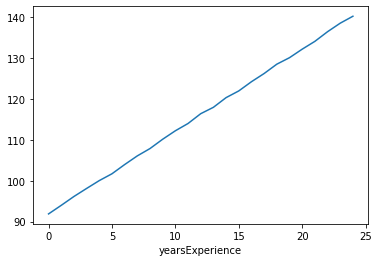

In [34]:
print(train_df.groupby(['yearsExperience']).describe()['salary'])
train_df.groupby(['yearsExperience']).describe()['salary']['mean'].plot(x='yearsExperience', y='salary')

Now that's an obvious slope of 2 and offset 90 linear relationship.

yearsExperience is an independent feature, Gaussian distributed, and has a simple linear trend pattern. If we scale it down using standard scaler, we won't distored the pattern and it'll release some burdent in training.

### Miles from metropolis
Span from 0 to 99 miles. Like yearsExperience, let's select a few and see their distributions.

I expect companies having offices in metropolis are likely to have higher net worth, thus the closer to metropolis, the more it pays. Again, is there a plateau? Is the relationship linear?

In [35]:
np.unique(train_df['milesFromMetropolis'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

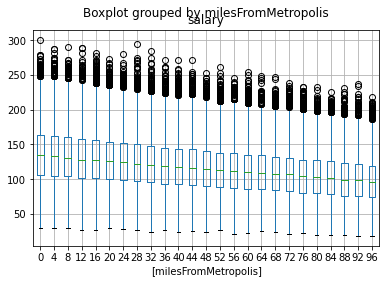

In [36]:
miles= np.arange(0, 99+1, 4)
for i in range(len(miles)):
    if i==0:
        groups = train_df[['milesFromMetropolis', 'salary']].loc[train_df['milesFromMetropolis']==miles[i], :]
    else:
        group = train_df[['milesFromMetropolis', 'salary']].loc[train_df['milesFromMetropolis']==miles[i], :]
        groups = pd.concat([groups, group], axis=0)

groups.boxplot(by='milesFromMetropolis')
plt.show()

1. It's a inverse linear relationship
2. Deviation decreases with average salary
3. Gaussian distribution and positive skew

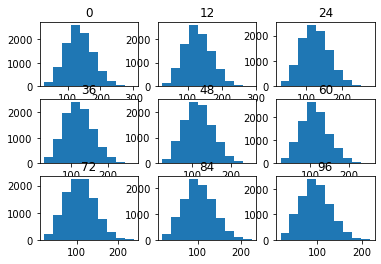

milesFromMetropolis
0     0.264
12    0.281
24    0.288
36    0.310
48    0.233
60    0.270
72    0.238
84    0.231
96    0.272
Name: salary, dtype: float64

In [37]:
miles= np.arange(0, 99+1, 12)
for i in range(len(miles)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_df.loc[train_df['milesFromMetropolis']==miles[i], 'salary'])
    plt.title(miles[i])
plt.show()

train_df.groupby(['milesFromMetropolis'])['salary'].skew()[miles]

The skewness is the small among all features and skews at similar rate. There's no obvious relationship between skewness and and milesFromMetropolis.

And to show the linearity, here's the plot of milesFromMetropolis vs. average salary.

count    999809.000
mean         49.528
std          28.878
min           0.000
25%          25.000
50%          50.000
75%          75.000
max          99.000
Name: milesFromMetropolis, dtype: float64


<AxesSubplot:xlabel='milesFromMetropolis'>

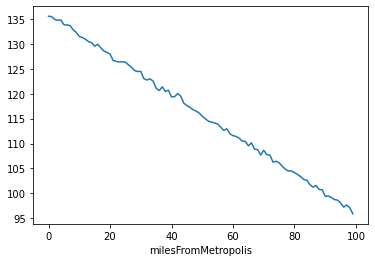

In [38]:
print(train_df['milesFromMetropolis'].describe())
train_df.groupby(['milesFromMetropolis']).describe()['salary']['mean'].plot(x='milesFromMetropolis', y='salary')

It's an obvious slope of -0.4 and offset 135 linear trend.

Similar to yearsExperience, milesFromMetropolis is an independent feature, Gaussian distributed, and has a simple (reversed) linear trend pattern.

### Data analysis conclusion
1. Without further data transformation, all features have obvious pattern/ranking
2. All features are Gaussian distributed and positive skewness
3. Higher average salary often pairs with wider distribution (larger deviation)
4. **companyId** provides little to no information related to salary
5. **jobType** has highest variance
    * Avearage salary ranges from 145 to 70
6. **degree** can potentially be split to two groups
    * NONE and HIGH_SCHOOL: more job opening but lower offer
    * BACHELORS, MASTERS, DOCTORAL: less job openings and higher offer
7. **major** has imbalanced data
    * More than half of dataset don't require a major
8. **industry** has smallest variance
    * Average salary ranges from 130 to 99
9. **yearsExperience** and **milesFromMetropolis** both are independent and linearly related to salary

## Transform data
The goal is to transform our data according to certain rules to further reveal the hidden pattern.

Obviously, we have to transform strings to meaningful numerical values. companyId, jobType, degree, major, and industry are the columns in dataset that need convertion. We have three options:
1. One-Hot Encoder
2. Label Encoder
3. Custome Label Encoder

Let's try all three and see which method gives me features that are:
1. Independent
2. Most correlated to salary

### Encoders
To find the best encoding method, let's use 50,000 samples for testing and see which yields best correlated features.
#### One Hot Encoder
In this case, one-hot encoding 50,000 samples takes too long, so use 500 samples instead. Also show first 40 out of 95 correlations with salary.

In [39]:
# TODO: write a class instead: class OneHotEncodingFeatures:
def one_hot_encode_features(data, features, test=None):
    for feature in features:
        for label in data[feature]:
            col_name = feature + "_" + label  # to avoid same label name, eg. NONE in degree and NONE in major
            data[col_name] = (data[feature]==label).astype(int)
            if test is not None:
                test[col_name] = (test[feature]==label).astype(int)
        data = data.drop(feature, axis=1)
        if test is not None:
            test = test.drop(feature, axis=1)
            
    if test is not None:
        return data, test
    else:
        return data

In [42]:
examples = 50000

In [43]:
# because one-hot encoding 50,000 samples takes too long, use 5,000 samples instead
example_set = train_df[:5000].copy()
one_hot_encode_features(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId']).head(5)

,yearsExperience,milesFromMetropolis,salary,jobType_CFO,jobType_CEO,jobType_VICE_PRESIDENT,jobType_MANAGER,jobType_JUNIOR,jobType_JANITOR,jobType_CTO,...,companyId_COMP59,companyId_COMP13,companyId_COMP39,companyId_COMP16,companyId_COMP9,companyId_COMP32,companyId_COMP62,companyId_COMP35,companyId_COMP18,companyId_COMP60
jobId,,,,,,,,,,,,,,,,,,,,,
JOB1362684407687,10,83,130,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JOB1362684407688,3,73,101,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JOB1362684407689,10,38,137,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JOB1362684407690,8,17,142,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JOB1362684407691,8,16,163,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# because one-hot encoding 50,000 samples takes too long, use 5,000 samples instead
example_set = train_df[:5000].copy()
show_corr = 40
one_hot_encode_features(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId']).corr()['salary'].iloc[:show_corr]

yearsExperience           0.368
milesFromMetropolis      -0.299
salary                    1.000
jobType_CFO               0.171
jobType_CEO               0.275
jobType_VICE_PRESIDENT    0.097
jobType_MANAGER          -0.007
jobType_JUNIOR           -0.178
jobType_JANITOR          -0.457
jobType_CTO               0.201
jobType_SENIOR           -0.106
degree_MASTERS            0.158
degree_HIGH_SCHOOL       -0.195
degree_DOCTORAL           0.236
degree_BACHELORS          0.122
degree_NONE              -0.259
major_MATH                0.110
major_NONE               -0.366
major_PHYSICS             0.092
major_CHEMISTRY           0.071
major_COMPSCI             0.101
major_BIOLOGY             0.058
major_LITERATURE          0.044
major_BUSINESS            0.155
major_ENGINEERING         0.153
industry_HEALTH          -0.005
industry_WEB              0.079
industry_AUTO            -0.063
industry_FINANCE          0.156
industry_EDUCATION       -0.173
industry_OIL              0.153
industry

One-Hot encoding is the standard way to transform strings to numericals, but this gives too many features (95 columns) and takes too long to generate. And if we look into the correlation matrix, the maximum negative correlation is jobType_JANITOR with magnitude of 0.457 and positive correlation is 0.368 from yearsExperience, which didn't need to be one-hot encoded. Thus, one-hot encoding doesn't give me strong correlated features.

#### Label Encoder
This method uses sklearn.preprocessing.LabelEncoder() to assign numerical values starting from 0.

In [40]:
# TODO: write a class instead: class LabelEncodingFeatures:
def label_features(data, features, test=None):
    encoder = sklearn.preprocessing.LabelEncoder()
    for feature in features:
        data[feature] = encoder.fit_transform(data[feature])
        if test is not None:
            test[feature] = encoder.transform(test[feature])
            
    if test is not None:
        return data, test
    else:
        return data

In [45]:
example_set = train_df[:examples].copy()
label_features(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId']).head(5)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,31,1,3,6,3,10,83,130
JOB1362684407688,11,0,2,7,6,3,73,101
JOB1362684407689,48,7,1,8,3,10,38,137
JOB1362684407690,32,5,1,2,0,8,17,142
JOB1362684407691,60,7,0,8,2,8,16,163


Following are the correlation scale and matrix:

companyId             -0.007
jobType               -0.232
degree                -0.232
major                 -0.265
industry               0.081
yearsExperience        0.374
milesFromMetropolis   -0.299
salary                 1.000
Name: salary, dtype: float64


<AxesSubplot:>

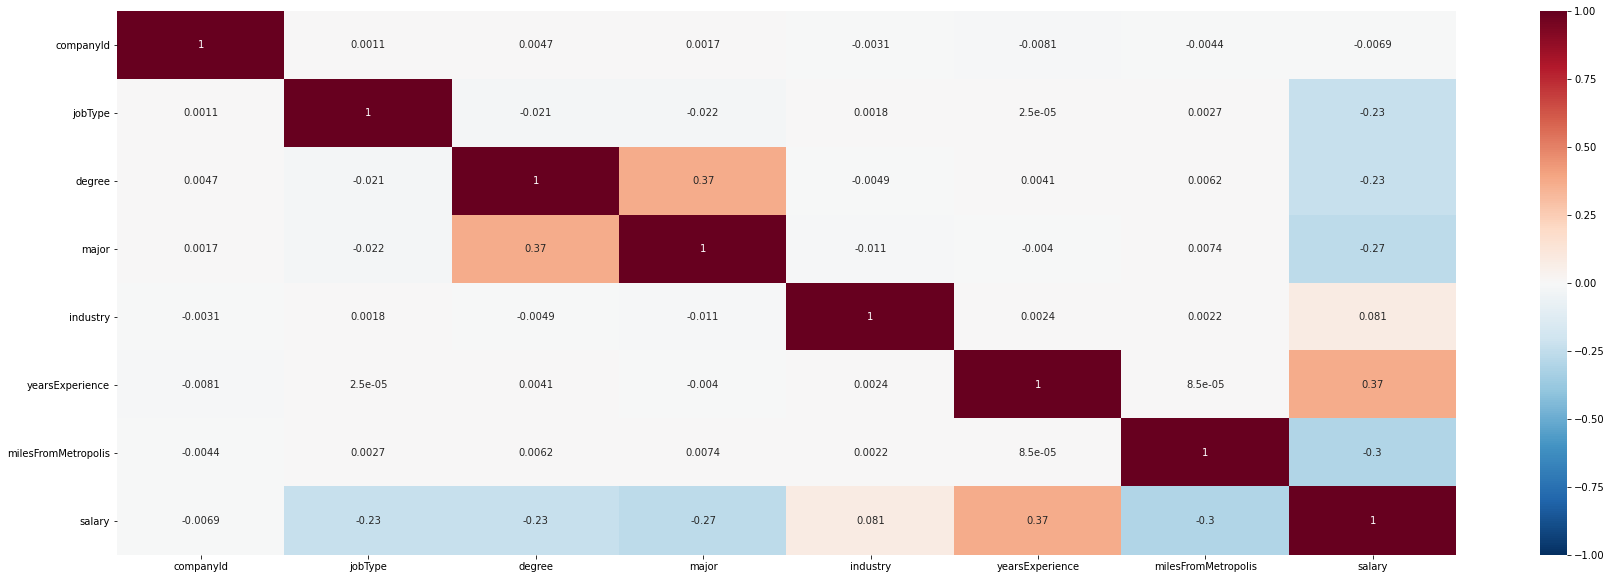

In [46]:
example_set = train_df[:examples].copy()
correlation = label_features(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId']).corr()

print(correlation['salary'])

plt.figure(figsize=(30, 10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

With Label Encoder:
1. No new features
2. Except companyId and industry, other features have good correlation with salary
3. Except major and degree, other pairs of features are independent from each other

This approach looks promissing! Let's see if we can lift the perfomance up a notch with custom Laber Encoder.

#### Custom Label Encoder
This method uses the ranking of average salary to assign numerical values starting from 1.
* Starts from 1 because rank() starts from 1, and I don't want to "deactivate" any label of each feature with 0
* Average salaries are rounded down, so labels with same average salary will have the same rank
* companyId: 63 companies are ranked according to average salary
* **jobType**: CEO = 1, CFO = 2, CTO = 2, VP = 4, MANAGER = 5, SENIOR = 6, JUNIOR = 7, JANITOR = 8
* **degree**: DOCTORAL = 1, MASTERS = 2, BACHELORS = 3, HIGH_SCHOOL = 4, NONE = 5
* **major**: ENGINEERING = 1, BUSINESS = 2, MATH = 3, COMPSCI = 4, PHYSICS = 5, CHEMISTRY = 6, BIOLOGY = 7, LITERATURE = 8, NONE = 9
* **industry**: FINANCE = 1, OIL = 1, WEB = 3, HEALTH = 4, AUTO = 5, SERVICE = 6, EDUCATION = 7

In [7]:
# TODO: write a class instead: class RankFeatures:
def rank_features(data, features, test=None):
    for feature in features:
        group = data.groupby([feature])
        group_salary = group.describe()['salary']
        group_salary_mean = group_salary['mean'].apply(np.floor)
        group_salary_rank = group_salary_mean.rank(ascending=False).astype(int)
        group_salary_rank_dict = dict(group_salary_rank)
        data[feature] = data[feature].apply(lambda x: group_salary_rank_dict[x])
        if test is not None:
            test[feature] = test[feature].apply(lambda x: group_salary_rank_dict[x])
            
    if test is not None:
        return data, test
    else:
        return data

In [47]:
example_set = train_df[:examples].copy()
rank_features(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId']).head(5)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,36,2,2,3,4,10,83,130
JOB1362684407688,50,1,4,9,3,3,73,101
JOB1362684407689,36,4,1,5,4,10,38,137
JOB1362684407690,36,5,1,5,5,8,17,142
JOB1362684407691,50,4,3,5,2,8,16,163


companyId             -0.039
jobType               -0.579
degree                -0.385
major                 -0.352
industry              -0.293
yearsExperience        0.374
milesFromMetropolis   -0.299
salary                 1.000
Name: salary, dtype: float64


<AxesSubplot:>

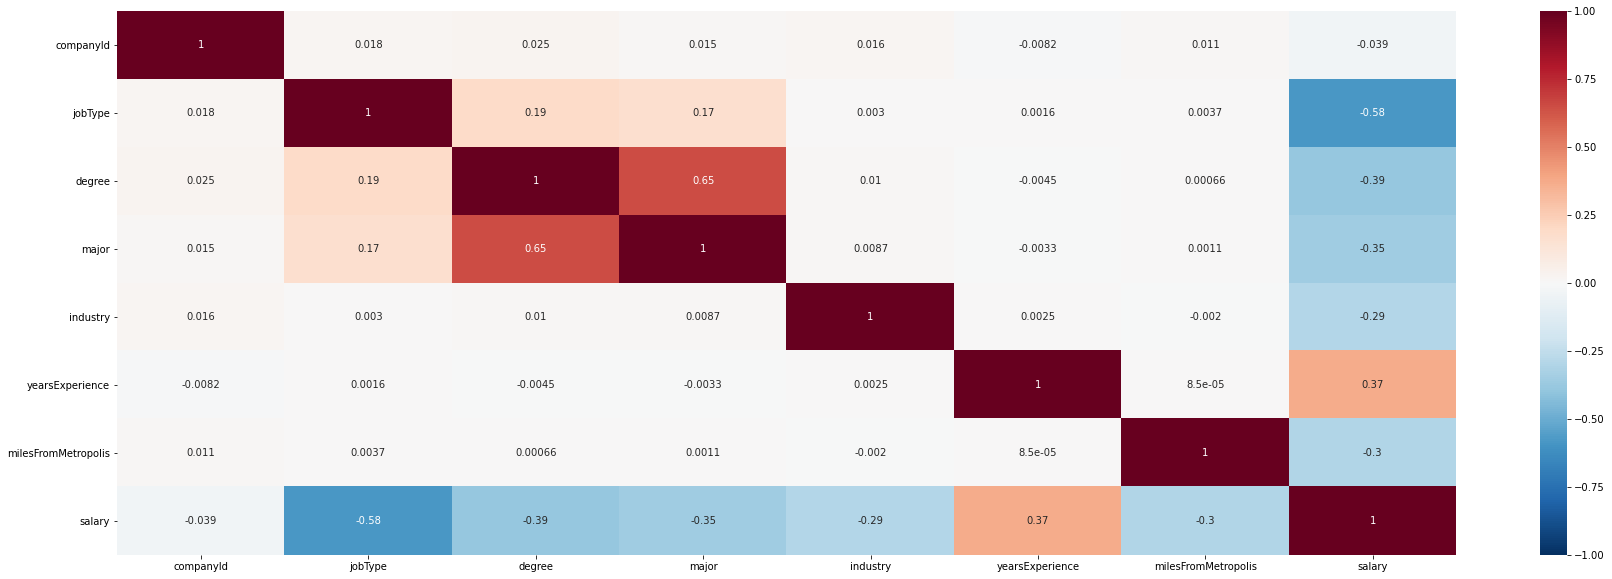

In [48]:
example_set = train_df[:examples].copy()
correlation = rank_features(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId']).corr()

print(correlation['salary'])

plt.figure(figsize=(30, 10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

From correlation matrix, we observe:
1. Correlation matrix of custom Label Encoder looks like correlation matrix of Label Encoder but better
2. Between Salary and other features, only companyId has low correlation with salary
    * Consider removing companyId
3. Between feature to feature, Major and Industry are highly correlated.
    * Consider merging Major and Industry to avoid possible noise
4. Between two features, pairs other than Major-Industry have low correlation, meaning two features are relatively independent from each other

Thus makes it the plausible encoder for our case.

### Transform data and test performance
Now we've selected our encoder, next is to transform data. From the correlation matrix with custom label encoder, we see some potential options for feature selection:
1. Drop companyId
2. Merge major or degree

We'll perform a quick test with LinearRegression model to see which of the following data transformaiton method yields the least MSE:
1. Keep companyId and not merge degree and major
2. Drop companyId and not merge degree and major
3. Keep companyId and merge degree and major
4. Drop companyId and merge degree and major

In [8]:
def merge_degree_major(train, test=None):
    group_salary_rank_dict = dict(train.groupby(['degree', 'major']).describe()['salary']['mean'].apply(np.floor).rank(ascending=False).astype(int))

    degree_major_rank = []
    for i in range(len(train.index)):
        degree_major_combination = (train['degree'].iloc[i], train['major'].iloc[i])
        degree_major_rank.append(group_salary_rank_dict[degree_major_combination])
    train['degree_major'] = pd.Series(degree_major_rank, index=train.index)
    train = train.drop(columns=['degree', 'major'])
    if test is None:
        return train
    
    else:
        degree_major_rank = []
        for i in range(len(test.index)):
            degree_major_combination = (test['degree'].iloc[i], test['major'].iloc[i])
            degree_major_rank.append(group_salary_rank_dict[degree_major_combination])
        test['degree_major'] = pd.Series(degree_major_rank, index=test.index)
        test = test.drop(columns=['degree', 'major'])
        return train, test

In [9]:
def feature_select(to_drop_companyId, to_merge_degree_major, train, test=None):
    if test is None:
        train = rank_features(train, ['jobType', 'industry'])
        
        if to_drop_companyId:
            train = train.drop(columns=['companyId'])
        else:
            train = rank_features(train, ['companyId'])
            
        if to_merge_degree_major:
            train = merge_degree_major(train)
        else:
            train = rank_features(train, ['degree', 'major'])
            
        return train

    else:
        train, test = rank_features(train, ['jobType', 'industry'], test)
        
        if to_drop_companyId:
            train = train.drop(columns=['companyId'])
            test = test.drop(columns=['companyId'])
        else:
            train, test = rank_features(train, ['companyId'], test)
            
        if to_merge_degree_major:
            train, test = merge_degree_major(train, test)            
        else:
            train, test = rank_features(train, ['degree', 'major'], test)
            
        return train, test

Now let's quickly test the performance with a simple LinearRegression and with different feature selection methods.

In [14]:
train_df = data.copy()
test_list = [(False, False), (True, False), (False, True), (True, True)]
validation_rows = 5000
for companyId, degree_major in test_list:
    train = feature_select(to_drop_companyId=companyId, to_merge_degree_major=degree_major, train=data.copy())

    valid_f = train.iloc[:validation_rows, :-1]
    valid_s = train.iloc[:validation_rows, -1].values.astype(float)
    train_f = train.drop(index=train.index[:validation_rows])
    train_s = train_f.pop('salary')

    model = LinearRegression()
    model.fit(train_f, train_s)
    valid_pred = model.predict(valid_f)
    mse = mean_squared_error(valid_s, valid_pred)
    mae = mean_absolute_error(valid_s, valid_pred)
    print("to_drop_companyId=%s, to_merge_degree_major=%s:\tMSE=%.3f\tMAE=%.3f" % (companyId, degree_major, mse, mae))

to_drop_companyId=False, to_merge_degree_major=False:	MSE=405.322	MAE=16.259
to_drop_companyId=True, to_merge_degree_major=False:	MSE=405.355	MAE=16.260
to_drop_companyId=False, to_merge_degree_major=True:	MSE=989.553	MAE=24.038
to_drop_companyId=True, to_merge_degree_major=True:	MSE=989.719	MAE=24.039


Seems like toggling to_drop_companyId gives same result, thus might as well remove companyId to improve training time. And not merging degree and major performs better than merging. Thus we'll remove companyId and keep major and degree as is.

## Split data

In [16]:
# train_df = data.copy()
validation_rows = 50000
train = feature_select(to_drop_companyId=True, to_merge_degree_major=False, train=train_df.copy())

valid_f = train.iloc[:validation_rows, :-1]
valid_s = train.iloc[:validation_rows, -1].values.astype(float)
train_f = train.drop(index=train.index[:validation_rows])
train_s = train_f.pop('salary')

print(train_f.shape, valid_f.shape)
print(train_s.shape, valid_s.shape)

(949809, 6) (50000, 6)
(949809,) (50000,)


In [30]:
display(train_df.head(3))
print(train_df.shape)
display(train_df.info())

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137


(999809, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 999809 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   companyId            999809 non-null  object
 1   jobType              999809 non-null  object
 2   degree               999809 non-null  object
 3   major                999809 non-null  object
 4   industry             999809 non-null  object
 5   yearsExperience      999809 non-null  int64 
 6   milesFromMetropolis  999809 non-null  int64 
 7   salary               999809 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 68.7+ MB


None

## Create models

### Baseline model
Create a naive model and measure its efficiency as my performance metrics baseline. I'm using average salary for each industry as my baseline model.

In [50]:
baseline_pred = []
industry_salary_mean = train_df.groupby(['industry']).describe()['salary']['mean']
baseline_true = train_df['salary'].values.astype(float)

for i in range(len(train_df.index)):
    industry = train_df['industry'].iloc[i]
    baseline_pred.append(industry_salary_mean.loc[industry])

mse = mean_squared_error(baseline_true, baseline_pred)
mae = mean_absolute_error(baseline_true, baseline_pred)
print("Baseline: MSE=%.3f\tMAE=%.3f" % (mse, mae))

Baseline: MSE=1370.681	MAE=29.663


SyntaxError: can't use starred expression here (<ipython-input-18-9b0492a6055f>, line 4)

In [1]:
tmp=[]
tmp.append([1,2,3])
tmp.append([1,2,3])
tmp.append([1,2,3])
print(tmp)

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]


### Regression and ensamble models

In [18]:
model_list = [('LR', LinearRegression()), 
              ('LASSO', Lasso()), 
              ('EN', ElasticNet()), 
              ('CART', DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ## Boosting
              ('AB', AdaBoostRegressor()), 
              ('GBR', GradientBoostingRegressor()), 
              ## Bagging
              ('RF', RandomForestRegressor()), 
              ('ET', ExtraTreesRegressor())]

for name, model in model_list:
    model.fit(train_f, train_s)
    valid_pred = model.predict(valid_f)
    mse = mean_squared_error(valid_s, valid_pred)
    mae = mean_absolute_error(valid_s, valid_pred)
    print("%s:\tMSE=%.3f\tMAE=%.3f" % (name, mse, mae))

# LR:	MSE=393.073	MAE=16.004
# LASSO:	MSE=393.682	MAE=16.023
# EN:	MSE=399.967	MAE=16.181
# CART:	MSE=656.987	MAE=19.898
# RF:	MSE=447.204	MAE=16.807
# AB:	MSE=532.805	MAE=19.321
# GBR:	MSE=366.553	MAE=15.506
# RF:	MSE=447.583	MAE=16.817
# ET:	MSE=519.517	MAE=17.920

LR:	MSE=393.073	MAE=16.004
LASSO:	MSE=393.682	MAE=16.023
EN:	MSE=399.967	MAE=16.181
CART:	MSE=656.987	MAE=19.898
RF:	MSE=447.204	MAE=16.807
AB:	MSE=532.805	MAE=19.321
GBR:	MSE=366.553	MAE=15.506
RF:	MSE=447.583	MAE=16.817
ET:	MSE=519.517	MAE=17.920


Pick the best models that have lower MSE: LinearRegression, Lasso, ElasticNet, and GradientBoostingRegressor. Tune hyperparameters and other adjustments to improve performance.

### Scalng

In [20]:
model_list = [("scaledLR",    Pipeline([("Scaler", StandardScaler()), ("LR", LinearRegression())])),
              ("scaledLASSO", Pipeline([("Scaler", StandardScaler()), ("LASSO", Lasso())])),
              ("scaledEN",    Pipeline([("Scaler", StandardScaler()), ("EN", ElasticNet())])),
              ("scaledGBR",   Pipeline([("Scaler", StandardScaler()), ("GBR", GradientBoostingRegressor())]))]

for name, model in model_list:
    model.fit(train_f, train_s)
    valid_pred = model.predict(valid_f)
    mse = mean_squared_error(valid_s, valid_pred)
    mae = mean_absolute_error(valid_s, valid_pred)
    print("%s:\tMSE=%.3f\tMAE=%.3f" % (name, mse, mae))

# scaledLR:	MSE=393.073	MAE=16.004
# scaledLASSO:	MSE=397.280	MAE=16.087
# scaledEN:	MSE=507.076	MAE=18.216
# scaledGBR:	MSE=366.553	MAE=15.506

scaledLR:	MSE=393.073	MAE=16.004
scaledLASSO:	MSE=397.280	MAE=16.087
scaledEN:	MSE=507.076	MAE=18.216
scaledGBR:	MSE=366.553	MAE=15.506


Standardize the data doesn't improve the performance. Let's try tuning hyperparameters.

### Tuning
#### Gradient Boosting Regressor

In [22]:
n_estimators_list = [50, 150, 250, 350]
loss_list = ['lad', 'huber']
learning_rate_list = [0.1, 0.01]

for ne in n_estimators_list:
    for loss in loss_list:
        for lr in learning_rate_list:
            model = GradientBoostingRegressor(n_estimators=ne, loss=loss, learning_rate=lr)
            model.fit(train_f, train_s)
            valid_pred = model.predict(valid_f)
            mse = mean_squared_error(valid_s, valid_pred)
            mae = mean_absolute_error(valid_s, valid_pred)
            print("(%d, %s, %.3f):\tMSE=%.3f\tMAE=%.3f" % (ne, loss, lr, mse, mae))

(50, lad, 0.100):	MSE=395.816	MAE=15.894
(50, lad, 0.010):	MSE=1024.709	MAE=25.367
(50, huber, 0.100):	MSE=392.731	MAE=15.918
(50, huber, 0.010):	MSE=1021.534	MAE=25.427
(150, lad, 0.100):	MSE=365.515	MAE=15.470
(150, lad, 0.010):	MSE=652.050	MAE=20.138
(150, huber, 0.100):	MSE=364.466	MAE=15.459
(150, huber, 0.010):	MSE=645.996	MAE=20.241
(250, lad, 0.100):	MSE=363.939	MAE=15.447
(250, lad, 0.010):	MSE=508.796	MAE=17.784
(250, huber, 0.100):	MSE=362.520	MAE=15.429
(250, huber, 0.010):	MSE=502.098	MAE=17.882
(350, lad, 0.100):	MSE=362.835	MAE=15.430
(350, lad, 0.010):	MSE=442.252	MAE=16.648
(350, huber, 0.100):	MSE=361.511	MAE=15.411
(350, huber, 0.010):	MSE=436.436	MAE=16.720


In [24]:
n_estimators_list = [300, 400]
learning_rate_list = [0.1, 0.13]
max_depth_list = [6, 8, 10]

for ne in n_estimators_list:
    for lr in learning_rate_list:
        for md in max_depth_list:
            model = GradientBoostingRegressor(n_estimators=ne, loss='huber', learning_rate=lr, max_depth=md)
            model.fit(train_f, train_s)
            valid_pred = model.predict(valid_f)
            mse = mean_squared_error(valid_s, valid_pred)
            mae = mean_absolute_error(valid_s, valid_pred)
            print("(%d, %.3f, %d):\tMSE=%.3f\tMAE=%.3f" % (ne, lr, md, mse, mae))

(300, 0.100, 6):	MSE=357.166	MAE=15.338
(300, 0.100, 8):	MSE=359.951	MAE=15.371
(300, 0.100, 10):	MSE=368.700	MAE=15.494
(300, 0.130, 6):	MSE=357.796	MAE=15.351


KeyboardInterrupt: 

## Deploy solution

In [ ]:
predictions = model.predict(test_features).round(3)
test_salary = pd.DataFrame(predictions, index=test_features.index)
test_salary.to_csv(os.path.join("data", "test_salary_prediction.csv"))

### Ensemble models

In [ ]:
model_list = [## Boosting
              ('AB', AdaBoostRegressor()), 
              ('GBR', GradientBoostingRegressor()), 
              ## Bagging
              ('RF', RandomForestRegressor()), 
              ('ET', ExtraTreesRegressor())]

for name, model in model_list:
    model.fit(train_df, train_salary)
    validation_pred = model.predict(validation_features)
    mse = mean_squared_error(validation_salary, validation_pred)
    mae = mean_absolute_error(validation_salary, validation_pred)
    print("%s:\tMSE=%.3f\tMAE=%.3f" % (name, mse, mae))

# expect:
# AB:	MSE=555.790	MAE=19.869
# GBR:	MSE=364.269	MAE=15.487
# RF:	MSE=139.587	MAE=9.053
# ET:	MSE=107.677	MAE=6.012

In [ ]:
ensembles = []
# Boosting
ensembles.append(('scaledAB',
                  Pipeline([('Scaler', StandardScaler()),
                            ('AB', AdaBoostRegressor())])))
ensembles.append(('scaledGBR',
                  Pipeline([('Scaler', StandardScaler()),
                            ('GBR', GradientBoostingRegressor())])))
## Bagging
ensembles.append(('scaledRF',
                  Pipeline([('Scaler', StandardScaler()),
                            ('RF', RandomForestRegressor())])))
ensembles.append(('scaledET',
                  Pipeline([('Scaler', StandardScaler()),
                            ('ET', ExtraTreesRegressor())])))

for name, model in ensembles:
    model.fit(train_df, train_salary)
    validation_pred = model.predict(validation_features)
    mse = mean_squared_error(validation_salary, validation_pred)
    mae = mean_absolute_error(validation_salary, validation_pred)
    print("%s:\tMSE=%.3f\tMAE=%.3f" % (name, mse, mae))

# expect:
# scaledAB:	MSE=553.240	MAE=19.786
# scaledGBR:	MSE=364.269	MAE=15.487
# scaledRF:	MSE=139.061	MAE=9.046
# scaledET:	MSE=107.677	MAE=6.012

In [11]:
train_df = data.copy()
model_list = [('LR', LinearRegression()), 
              ('LASSO', Lasso()), 
              ('EN', ElasticNet()), 
              ('CART', DecisionTreeRegressor()), 
              ('RF', RandomForestRegressor())]
validation_rows = 10000
for (model_name, model) in model_list:


    model.fit(train_f, train_s)
    valid_pred = model.predict(valid_f)
    mse = mean_squared_error(valid_s, valid_pred)
    mae = mean_absolute_error(valid_s, valid_pred)
    print("model=%s,\tto_drop_companyId=%s, to_merge_degree_major=%s:\tMSE=%.3f\tMAE=%.3f" % 
          (model_name, companyId, degree_major, mse, mae))
"""
model=LR,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=393.114	MAE=15.979
model=LASSO,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=394.213	MAE=16.006
model=EN,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=400.965	MAE=16.166
model=CART,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=686.648	MAE=20.350
model=RF,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=435.528	MAE=16.634
model=LR,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=393.119	MAE=15.980
model=LASSO,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=394.216	MAE=16.006
model=EN,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=400.967	MAE=16.166
model=CART,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=642.333	MAE=19.651
model=RF,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=438.890	MAE=16.668
model=LR,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=958.742	MAE=23.763
model=LASSO,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=948.846	MAE=23.606
model=EN,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=1111.485	MAE=25.481
model=CART,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=8083.295	MAE=82.648
model=RF,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=7966.888	MAE=82.662
model=LR,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=958.884	MAE=23.764
model=LASSO,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=948.890	MAE=23.607
model=EN,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=1111.605	MAE=25.482
model=CART,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=8006.305	MAE=82.538
model=RF,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=7948.391	MAE=82.554
"""

model=LR,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=393.114	MAE=15.979
model=LASSO,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=394.213	MAE=16.006
model=EN,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=400.965	MAE=16.166
model=CART,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=686.648	MAE=20.350
model=RF,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=435.528	MAE=16.634
model=LR,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=393.119	MAE=15.980
model=LASSO,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=394.216	MAE=16.006
model=EN,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=400.967	MAE=16.166
model=CART,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=642.333	MAE=19.651
model=RF,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=438.890	MAE=16.668
model=LR,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=958.742	MAE=23.763
model=LASSO,	to_drop_companyId=False, t

In [10]:
train_df = data.copy()
test_list = [(False, False), (True, False), (False, True), (True, True)]
model_list = [## Boosting
              ('AB', AdaBoostRegressor()), 
              ('GBR', GradientBoostingRegressor()), 
              ## Bagging
              ('RF', RandomForestRegressor()), 
              ('ET', ExtraTreesRegressor())]
validation_rows = 10000
for (companyId, degree_major) in test_list:
    for (model_name, model) in model_list:
        train = feature_select(to_drop_companyId=companyId, to_merge_degree_major=degree_major, train=data.copy())

        valid_f = train.iloc[:validation_rows, :-1]
        valid_s = train.iloc[:validation_rows, -1].values.astype(float)
        train_f = train.drop(index=train.index[:validation_rows])
        train_s = train_f.pop('salary')

        model.fit(train_f, train_s)
        valid_pred = model.predict(valid_f)
        mse = mean_squared_error(valid_s, valid_pred)
        mae = mean_absolute_error(valid_s, valid_pred)
        print("model=%s,\tto_drop_companyId=%s, to_merge_degree_major=%s:\tMSE=%.3f\tMAE=%.3f" % 
              (model_name, companyId, degree_major, mse, mae))

"""
Expect:
model=AB,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=545.306	MAE=19.586
model=GBR,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=366.419	MAE=15.532
model=RF,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=434.414	MAE=16.592
model=ET,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=507.821	MAE=17.748
model=AB,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=555.479	MAE=19.755
model=GBR,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=366.419	MAE=15.532
model=RF,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=436.426	MAE=16.643
model=ET,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=507.160	MAE=17.782
model=AB,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=10058.697	MAE=96.473
model=GBR,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=7936.804	MAE=83.056
model=RF,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=7964.971	MAE=82.636
model=ET,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=8044.035	MAE=82.660
model=AB,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=10134.425	MAE=96.792
model=GBR,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=7936.804	MAE=83.056
model=RF,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=7949.010	MAE=82.555
model=ET,	to_drop_companyId=True, to_merge_degree_major=True:	MSE=7988.281	MAE=82.480
"""

model=AB,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=545.306	MAE=19.586
model=GBR,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=366.419	MAE=15.532
model=RF,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=434.414	MAE=16.592
model=ET,	to_drop_companyId=False, to_merge_degree_major=False:	MSE=507.821	MAE=17.748
model=AB,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=555.479	MAE=19.755
model=GBR,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=366.419	MAE=15.532
model=RF,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=436.426	MAE=16.643
model=ET,	to_drop_companyId=True, to_merge_degree_major=False:	MSE=507.160	MAE=17.782
model=AB,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=10058.697	MAE=96.473
model=GBR,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=7936.804	MAE=83.056
model=RF,	to_drop_companyId=False, to_merge_degree_major=True:	MSE=7964.971	MAE=82.636
model=ET,	to_drop_companyId=False, to_merge